# IMPORTS

In [ ]:
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition



#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE



from sklearn.feature_extraction.text import TfidfVectorizer


COLORS = ['aliceblue', 'darkkhaki',  'linen','darkmagenta', 'darkolivegreen',  'orchid' , 'honeydew', 'mediumblue','antiquewhite', 'mediumturquoise','gray', 'grey', 'green', 'aqua', 'aquamarine', 'azure']

# Artificial data

In [ ]:


def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons

    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R

    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

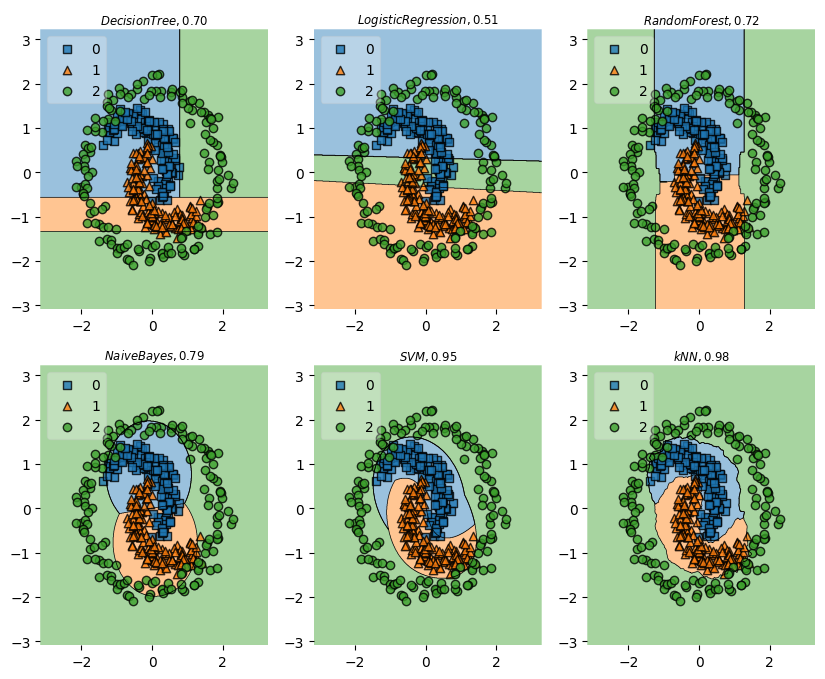

In [ ]:


clf0 = tree.DecisionTreeClassifier(max_depth=2)

clf1 = LogisticRegression()
clf2 = RandomForestClassifier(max_depth=1)
clf3 = GaussianNB()
clf4 = SVC()
clf5 = KNeighborsClassifier()

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['Decision Tree  ','Logistic Regression  ', 'Random Forest  ', 'Naive Bayes  ', 'SVM ', 'kNN ']
for clf, lab, grd in zip([clf0, clf1, clf2, clf3, clf4, clf5],
                         labels,
                         itertools.product([0, 1,2], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y, clf.predict(X))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ', ' + str('{:.2f}'.format(a))+'}$')

plt.show()

#GRADIENT BOOSTING

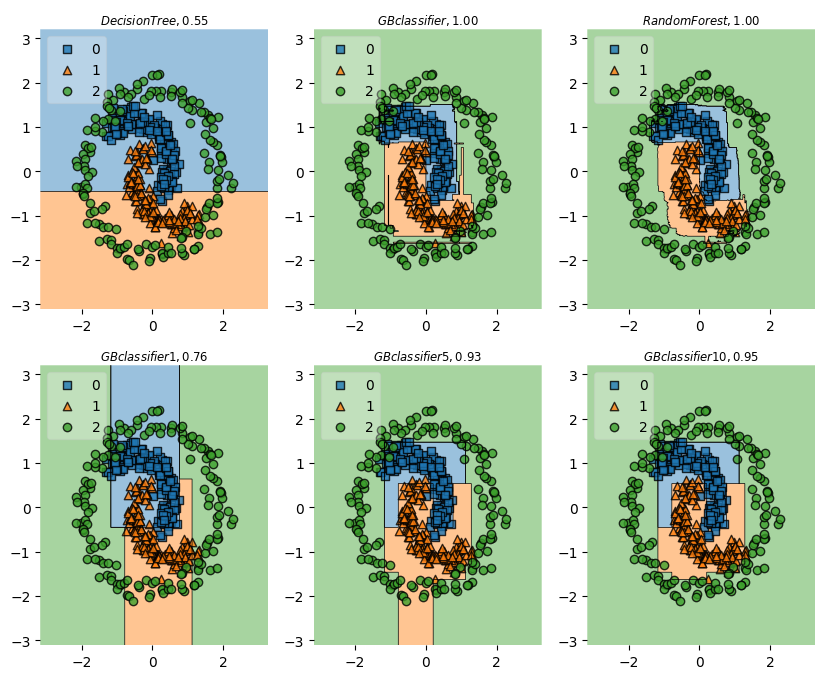

In [ ]:
X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

tuples = [(0, 0),(0, 1),(0, 2),(1, 0),(1, 1),(1,2)]

clf0 = tree.DecisionTreeClassifier(max_depth=1)
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = GradientBoostingClassifier(n_estimators=1, max_depth=2)
clf4 = GradientBoostingClassifier(n_estimators=5, max_depth=2)
clf5 = GradientBoostingClassifier(n_estimators=10, max_depth=2)

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['Decision Tree  ','GB classifier  ', 'Random Forest  ', 'GB classifier1  ', 'GB classifier 5 ', 'GB classifier 10  ']
for clf, lab, grd in zip([clf0, clf1, clf2,  clf3, clf4, clf5],
                         labels,
                         tuples):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y, clf.predict(X))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ', ' + str('{:.2f}'.format(a))+'}$')

plt.show()

# MNIST

In [ ]:


%config InlineBackend.figure_format='retina'

In [ ]:
data = pd.read_csv('sample_data/mnist_train_small.csv')

In [ ]:
data

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
a = data.iloc[0].to_numpy()
a.shape

(785,)

In [ ]:
np.sqrt(784)

28.0

5


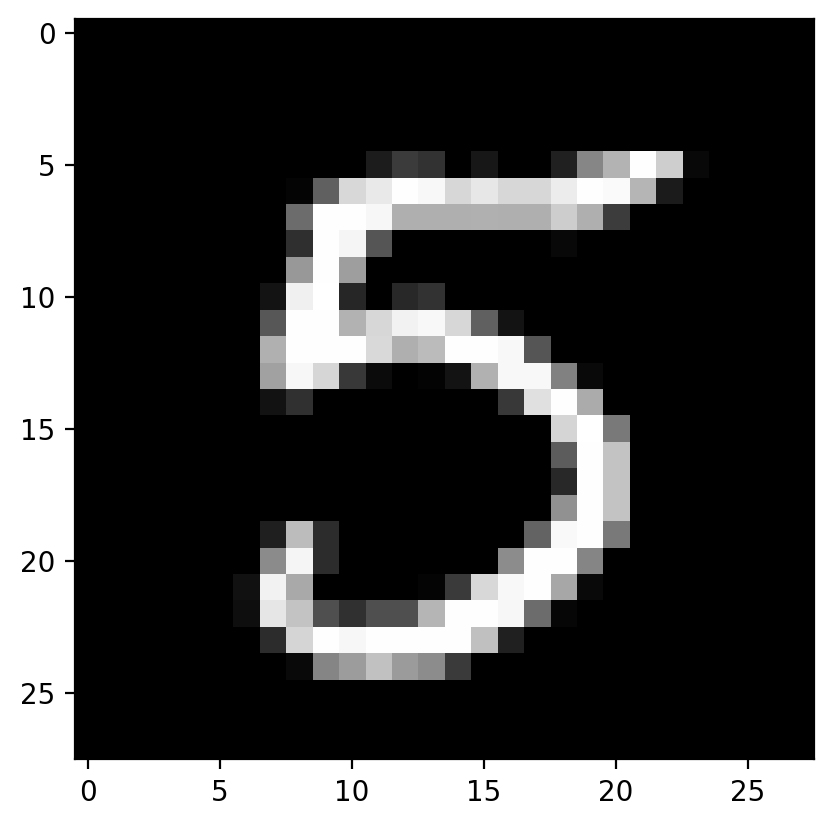

In [ ]:
number = a[0]
image = a[1:].reshape(28, 28)

print(number)
plt.imshow(image, cmap='gray')

In [ ]:
u,s,v = np.linalg.svd(image -image.mean(axis=0))

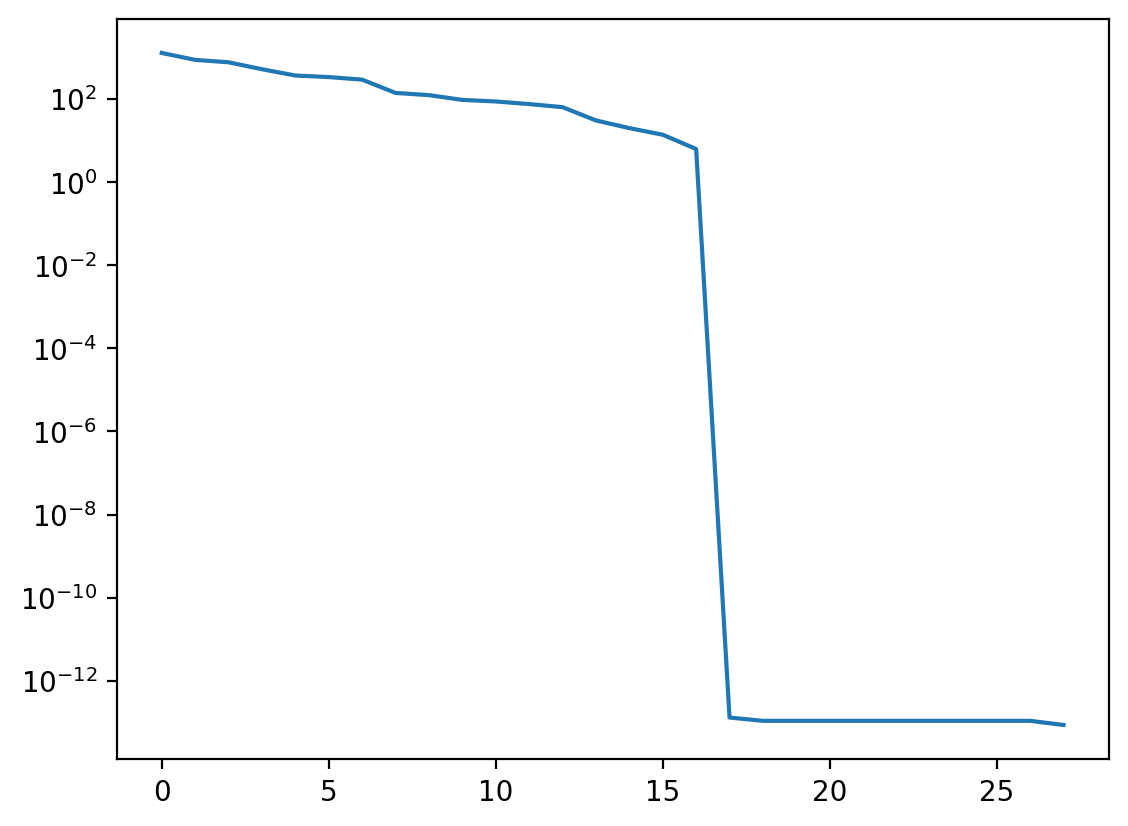

In [ ]:
plt.semilogy(s)

In [ ]:
a = data.to_numpy()
a.shape

(19999, 785)

In [ ]:
y, x = a[:, 0], a[:, 1:]

In [ ]:
y.shape

(19999,)

In [ ]:
x.shape

(19999, 784)

# PCA

In [ ]:
classes = list(set(y))

class_colors = {}
for i in range(len(classes)):
    class_colors[classes[i]] = COLORS[i % len(COLORS)]

print(class_colors)
color_list = [class_colors[a] for a in y]

{0: 'aliceblue', 1: 'darkkhaki', 2: 'linen', 3: 'darkmagenta', 4: 'darkolivegreen', 5: 'orchid', 6: 'honeydew', 7: 'mediumblue', 8: 'antiquewhite', 9: 'mediumturquoise'}


In [ ]:

pca = PCA(3)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.shape

(19999, 3)

In [ ]:
principal_df.values

array([[ 446.46638571, -254.67031979, -804.15949061],
       [ 509.21709019,  729.96294396,  194.97154377],
       [ 346.92535274,  716.67836164, -727.56809975],
       ...,
       [ 592.24704874,  -73.05513731,  953.86082176],
       [-363.62737447,  288.1592561 ,  614.38710215],
       [ 363.14371396, -419.76973247, -812.54762645]])

In [ ]:
principal_df.iloc[:100, 0].values, principal_df.iloc[:100, 1].values, principal_df.iloc[:100, 1].values

In [ ]:

fig = go.Figure([

go.Scatter3d(x=principal_df.iloc[:1000, 0].values,
             y=principal_df.iloc[:1000, 1].values,
             z=principal_df.iloc[:1000, 1].values,
             mode='markers',text = y, marker={'size': 7,
              'opacity': 1,
              'color': color_list[:1000]
              }  )])

In [ ]:
fig.show()

In [ ]:
plotly.__version__

'5.15.0'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y)


In [ ]:


clf0 = ...
clf2 = ...
clf3 = ...
clf5 =...



labels = ['Decision Tree  ', 'Random Forest  ', 'Naive Bayes  ', 'kNN ']
for clf, lab  in zip([clf0,  clf2, clf3,  clf5],
                         labels):

    clf.fit(X_train, y_train)

    a = accuracy_score(y_test, clf.predict(X_test))
    print(lab, a)



Decision Tree   0.617
Random Forest   0.9552
Naive Bayes   0.5972
kNN  0.9578


In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principal_df.values,y)

In [ ]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)

clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf5 = KNeighborsClassifier(n_neighbors=3)



labels = ['Decision Tree  ', 'Random Forest  ', 'Naive Bayes  ', 'kNN ']
for clf, lab  in zip([clf0,  clf2, clf3,  clf5],
                         labels):

    clf.fit(X_train_pca, y_train_pca)

    a = accuracy_score(y_test_pca, clf.predict(X_test_pca))
    print(lab, a)

Decision Tree   0.4212
Random Forest   0.4862
Naive Bayes   0.464
kNN  0.4558


# LINEAR REGRESSION FOR MNIST

In [ ]:
data_train = pd.read_csv("/content/sample_data/mnist_train_small.csv").to_numpy()
data_test = pd.read_csv("/content/sample_data/mnist_test.csv").to_numpy()
I = np.eye(10)

features_train, targets_train = np.array(data_train[:, 1:]), I[np.array(data_train[:, 0])]
features_train = features_train / np.linalg.norm(features_train, axis=1, keepdims=True)

features_test, targets_test = np.array(data_test[:, 1:]), I[np.array(data_test[:, 0])]
features_test = features_test / np.linalg.norm(features_test, axis=1, keepdims=True)

In [ ]:
targets_train.shape

(19999, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


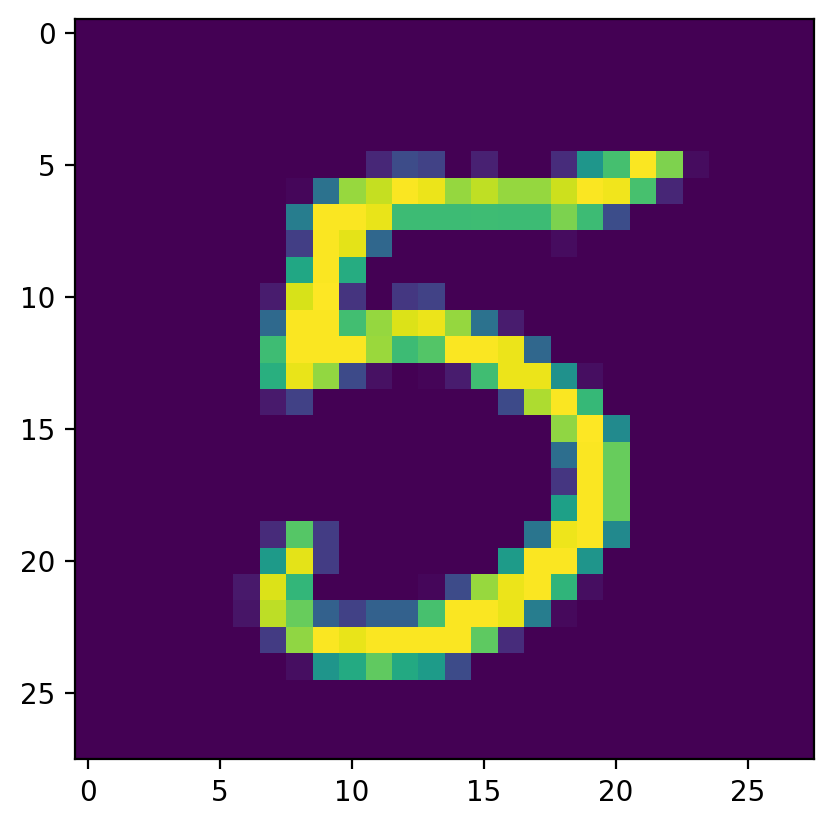

In [ ]:
plt.imshow(features_train[0].reshape(28, 28))
print(targets_train[0]);

In [ ]:
lr = LinearRegression().fit(features_train, targets_train)

In [ ]:
preds = lr.predict(features_test)

In [ ]:
preds[0,:]

array([ 0.17674823, -0.1940113 ,  0.78431292,  0.15347711, -0.21266217,
        0.18349839,  0.26927416, -0.02842539, -0.06321749, -0.0734905 ])

In [ ]:
targets_test[0, :]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
targets_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
preds_ = np.argmax(preds, axis=1)

In [ ]:
preds_

array([2, 1, 0, ..., 4, 5, 6])

In [ ]:
targets_ = np.argmax(targets_test, axis=1)

In [ ]:
targets_

array([2, 1, 0, ..., 4, 5, 6])

In [ ]:
np.sum(preds_ ==targets_)/len(targets_)

0.8643864386438644

# TWITTER SENTIMENT ANALYSIS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_sentiment = pd.read_csv('/content/drive/MyDrive/tweets-3-classes-9999.csv')

In [ ]:
data_sentiment

,Unnamed: 0,raw_text,label
0,0,@JanaBanana5 Oh my word...so tell me are you a...,negative
1,1,Just watched the series finale of Scrubs. Why ...,negative
2,2,Just screwed up the fried noodles by adding ra...,negative
3,3,@ladybug8320 5 weeks is a long time!,negative
4,4,Synching my contacts from my old mobile to iPh...,negative
...,...,...,...
9994,9994,BREAKING: Supreme Court convicts in disproport...,neutral
9995,9995,If @Mr_A_Johnson is up. #twitter is gona have ...,neutral
9996,9996,"#Microsoft #Cloud Oracle, Windows Garner Diffe...",neutral
9997,9997,@paulbentleymelb @apple I think they call that...,neutral


In [ ]:
data_sentiment[data_sentiment.label=='neutral'].values

array([[6666,
        'In honor of Steve Jobs. @apple #RIPSteve http://t.co/NyjhkNoU',
        'neutral'],
       [6667,
        'Learn how to keep Microsoft #Exchange costs low today at 11am Pacific.  Win with #Microsoft and #NetApp Webcast @ http://t.co/3NJAayMp',
        'neutral'],
       [6668,
        'RT @BuzzzIt: BuzZz...: Google Wallet Introduction Video http://t.co/Q00gYwQH #Google #Wallet',
        'neutral'],
       ...,
       [9996,
        "#Microsoft #Cloud Oracle, Windows Garner Different Views over Multitenant Cloud ...: Microsoft's cloud appr... http://t.co/lVzJNRPs #TCN",
        'neutral'],
       [9997,
        "@paulbentleymelb @apple I think they call that profit-making 'genius'",
        'neutral'],
       [9998,
        '#Microsoft researchers want to turn your hand into a touchscreen http://t.co/byYIcRpS',
        'neutral']], dtype=object)

In [ ]:
data_sentiment.label.unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [ ]:
data_sentiment = data_sentiment.replace(['negative', 'positive', 'neutral'],[0, 2, 1])

In [ ]:
data_sentiment

,Unnamed: 0,raw_text,label
0,0,@JanaBanana5 Oh my word...so tell me are you a...,0
1,1,Just watched the series finale of Scrubs. Why ...,0
2,2,Just screwed up the fried noodles by adding ra...,0
3,3,@ladybug8320 5 weeks is a long time!,0
4,4,Synching my contacts from my old mobile to iPh...,0
...,...,...,...
9994,9994,BREAKING: Supreme Court convicts in disproport...,1
9995,9995,If @Mr_A_Johnson is up. #twitter is gona have ...,1
9996,9996,"#Microsoft #Cloud Oracle, Windows Garner Diffe...",1
9997,9997,@paulbentleymelb @apple I think they call that...,1


In [ ]:
data_sentiment = data_sentiment.dropna()
data_sentiment = data_sentiment.drop_duplicates()

In [ ]:

from gensim.parsing.preprocessing import remove_stopwords

def stopword_removal(row):
    text = row['raw_text']
    text = remove_stopwords(text)
    return text

data_sentiment['raw_text'] = data_sentiment.apply(stopword_removal, axis=1)

In [ ]:

data_sentiment['raw_text']

In [ ]:
data_sentiment['raw_text'] = data_sentiment['raw_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

<ipython-input-68-527ac72967a1>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data_sentiment

,Unnamed: 0,raw_text,label
0,0,janabanana5 oh word so tell mother now lol i ...,0
1,1,just watched series finale scrubs why good sho...,0
2,2,just screwed fried noodles adding raw garnishe...,0
3,3,ladybug8320 5 weeks long time,0
4,4,synching contacts old mobile iphone import work,0
...,...,...,...
9994,9994,breaking supreme court convicts disproportiona...,1
9995,9995,if mr_a_johnson up twitter gona technical diff...,1
9996,9996,microsoft cloud oracle windows garner differe...,1
9997,9997,paulbentleymelb apple i think profit making g...,1


In [ ]:
data_sentiment.label.values


array([0, 0, 0, ..., 1, 1, 1])

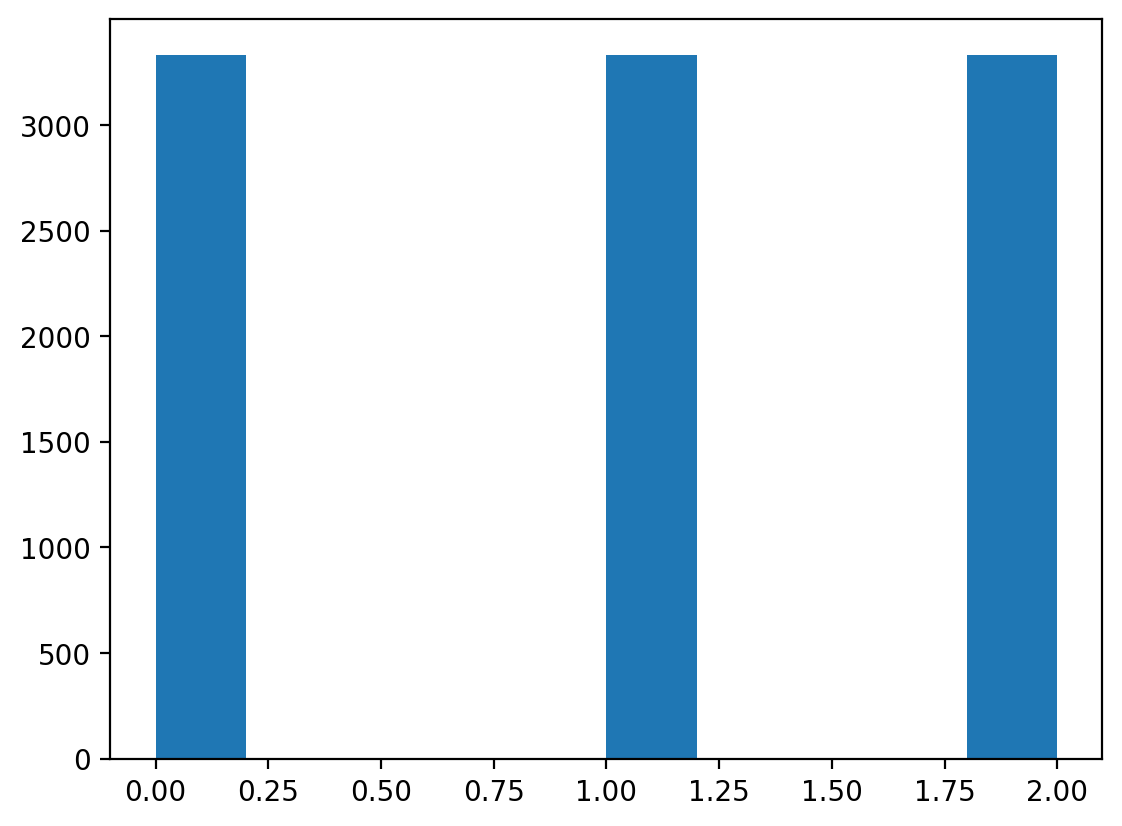

In [ ]:
plt.hist(data_sentiment.label.values);


In [ ]:
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter  = train_test_split(data_sentiment['raw_text'].values, data_sentiment['label'].values )

In [ ]:

vectorizer = TfidfVectorizer(max_features = 700)
X_train_ = vectorizer.fit(X_train_twitter).transform(X_train_twitter)
X_test_ = vectorizer.transform(X_test_twitter)

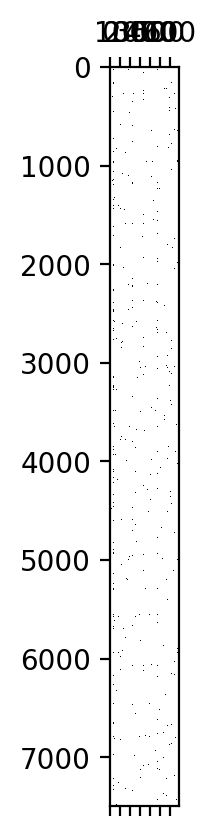

In [ ]:
plt.spy(X_train_.toarray(), precision=0.1)

In [ ]:
35361/(7499*700)

0.006736326748328349

In [ ]:
clf0 = ...

clf2 = ...
clf3 = ...
clf4 = ...
clf5 = ...



labels = ['Decision Tree  ', 'Random forest', 'Naive Bayes  ', 'SVC ', 'kNN ']
for clf, lab  in zip([clf0,  clf2, clf3, clf4, clf5],
                         labels):

    clf.fit(X_train_.toarray(), y_train_twitter)

    a = accuracy_score(y_test_twitter, clf.predict(X_test_.toarray()))
    print(lab, a)

Decision Tree   0.5044
Random forest 0.684
Naive Bayes   0.6276
SVC  0.6776
kNN  0.5752


# REAL WORLD  DATA

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


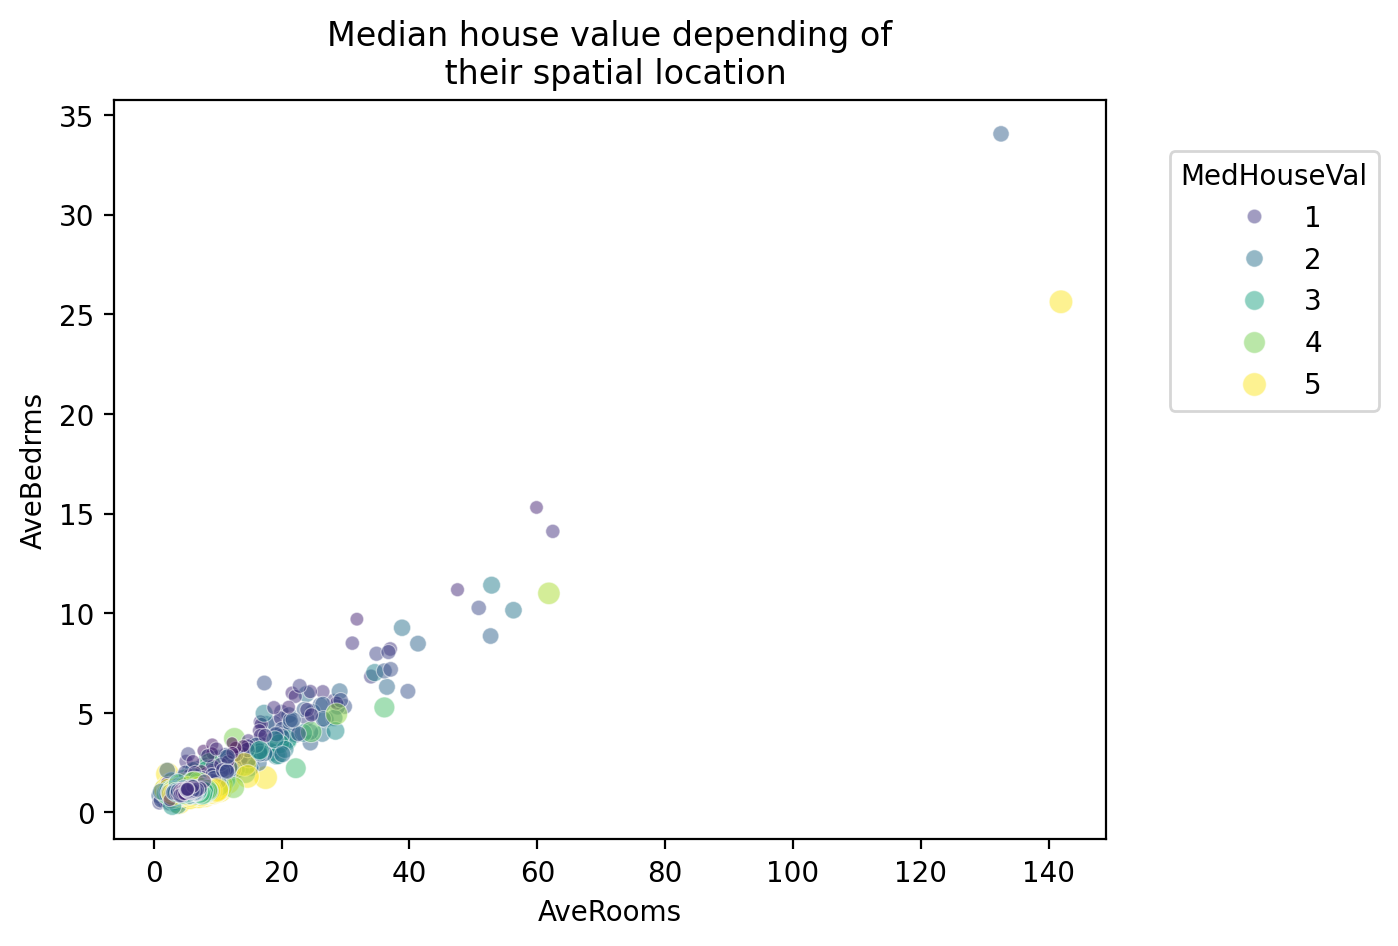

In [ ]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="AveRooms",
    y="AveBedrms",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target)

In [ ]:
scaler_x = StandardScaler()
scaler_x.fit(x_train)
x_scaled = scaler_x.transform(x_train)

scaler_y = StandardScaler()
scaler_y.fit(y_train.values[:, None])
y_scaled = scaler_y.transform(y_train.values[:, None])

In [ ]:
x_scaled_test = scaler_x.transform(x_test)
y_scaled_test= scaler_y.transform(y_test.values[:, None])

In [ ]:
lr = LinearRegression().fit(x_scaled, y_scaled[:, 0])

In [ ]:
lr.score(x_scaled_test, y_scaled_test)

0.614103384628162

In [ ]:

lr.predict(x_scaled_test)

array([-0.27541063, -0.48908933, -1.07785292, ..., -0.42042064,
        0.2283003 , -0.25934879])

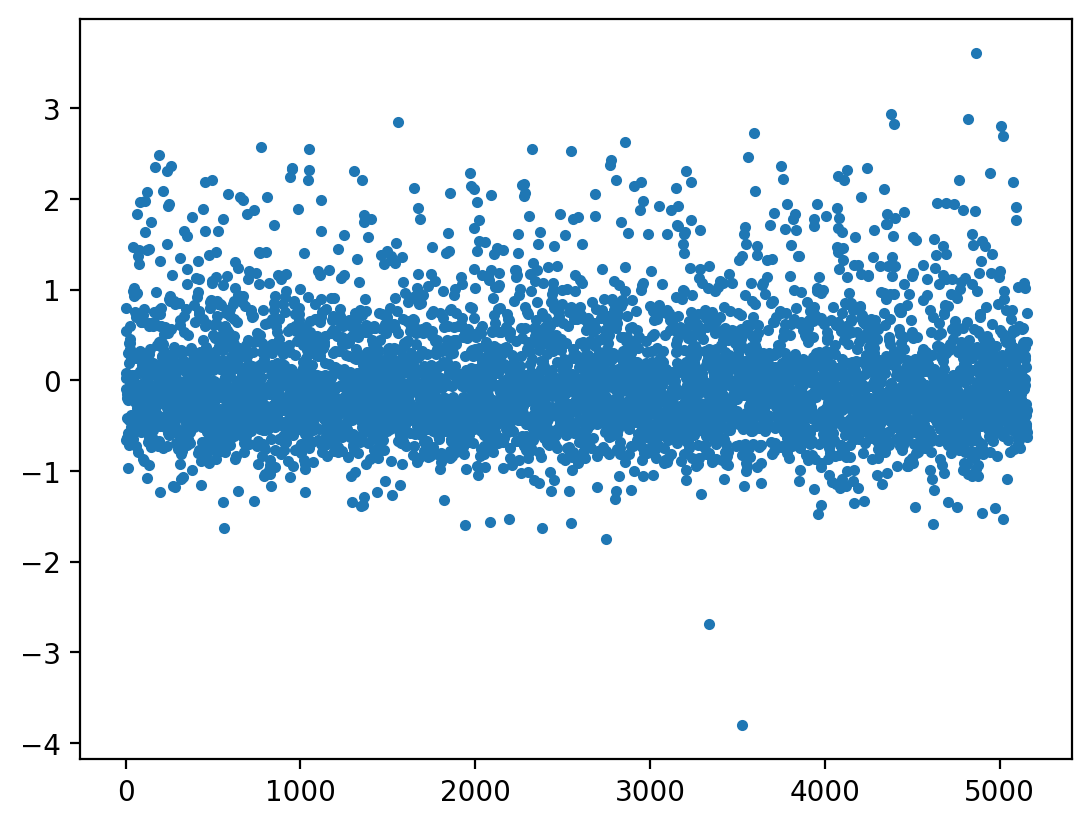

In [ ]:
residual = y_scaled_test.reshape(-1,) - lr.predict(x_scaled_test)
np.linalg.norm(residual) / np.linalg.norm(y_scaled_test.reshape(-1,))

plt.plot(residual, ".")

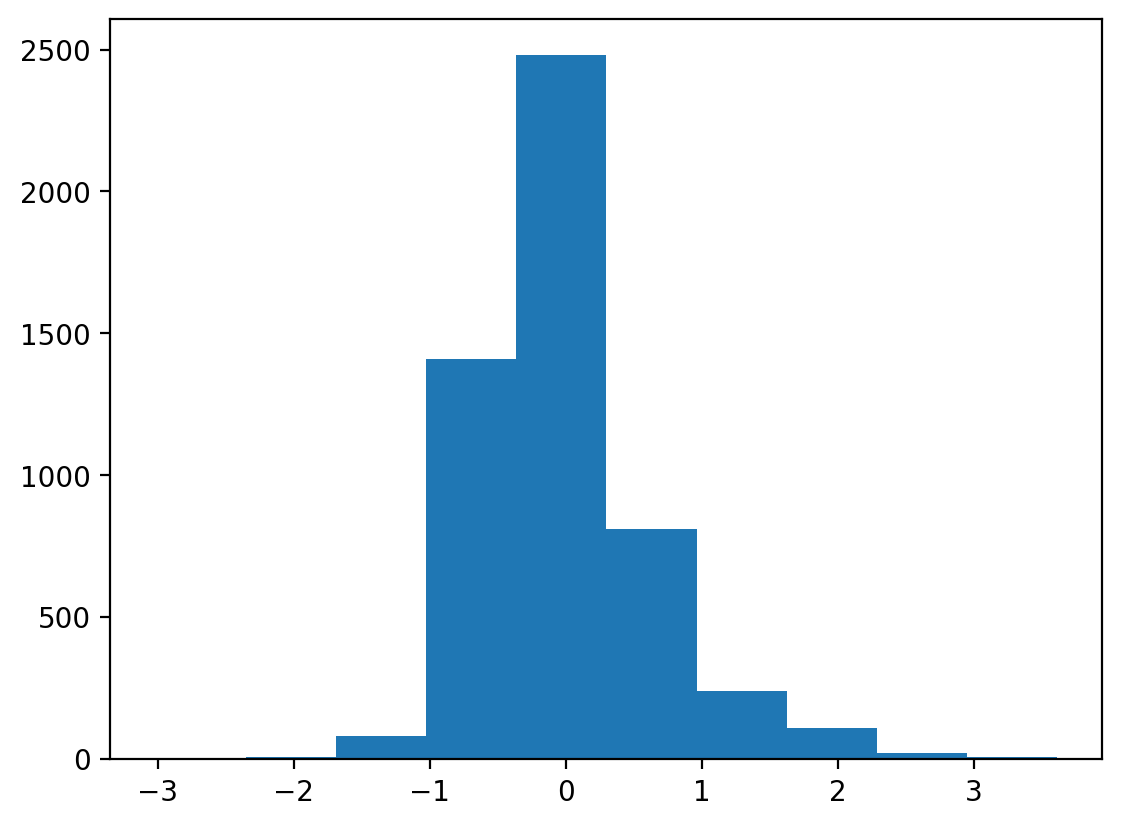

In [ ]:
plt.hist(residual);

In [ ]:
np.linalg.norm(y_scaled_test - lr.predict(x_scaled_test))/np.linalg.norm(y_scaled_test )

91.1444357028613